In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Using TensorFlow backend.


In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

--2019-10-17 15:55:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5539328 (5.3M) [application/x-httpd-php]
Saving to: ‘default of credit card clients.xls.3’

default of credit c 100%[===================>]   5.28M  17.6MB/s    in 0.3s    

2019-10-17 15:55:20 (17.6 MB/s) - ‘default of credit card clients.xls.3’ saved [5539328/5539328]



In [3]:
!ls

'default of credit card clients.xls'	'default of credit card clients.xls.3'
'default of credit card clients.xls.1'	 sample_data
'default of credit card clients.xls.2'


In [0]:
df = pd.read_excel("default of credit card clients.xls",skiprows = [0],index_col=[0])

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
#### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
#### X2: Gender (1 = male; 2 = female).
#### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
#### X4: Marital status (1 = married; 2 = single; 3 = others).
#### X5: Age (year).
#### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
#### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
#### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
x_col = df.columns[:-1]
y_col = df.columns[-1]
x = df[x_col]
y = df[y_col]

In [7]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [8]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


### Visualising defaulters according to their marriage 

No handles with labels found to put in legend.


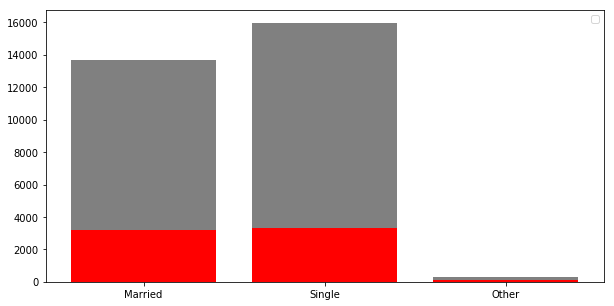

In [9]:
_MARRIAGE_RANGE= [1,2,3]
plt.figure(figsize=(10,5))

married= df['MARRIAGE'][df['MARRIAGE']==1].count()
married_default = df['MARRIAGE'][(df['MARRIAGE']==1)&(df['default payment next month']==1)].count()

single=df['MARRIAGE'][df['MARRIAGE']==2].count()
single_default = df['MARRIAGE'][(df['MARRIAGE']==2)&(df['default payment next month']==1)].count()

others=df['MARRIAGE'][df['MARRIAGE']==3].count()
others_default = df['MARRIAGE'][(df['MARRIAGE']==3)&(df['default payment next month']==1)].count()


marriage_total = [married,single,others]
default_marriage_total = [married_default,single_default,others_default]

plt.bar(_MARRIAGE_RANGE,marriage_total, color='grey')
plt.bar(_MARRIAGE_RANGE,default_marriage_total, color='red')
plt.xticks([1,2,3],['Married','Single','Other'])
plt.legend()
plt.show()

#### Percentage defaulters according to marriage status

In [10]:
p_married = (married_default/married)*100
p_single = (single_default/single)*100
p_others = (others_default/others)*100


p_married,p_single,p_others

(23.471703638626547, 20.928338762214985, 26.006191950464398)

### Visualising defaulters according to their education 

No handles with labels found to put in legend.


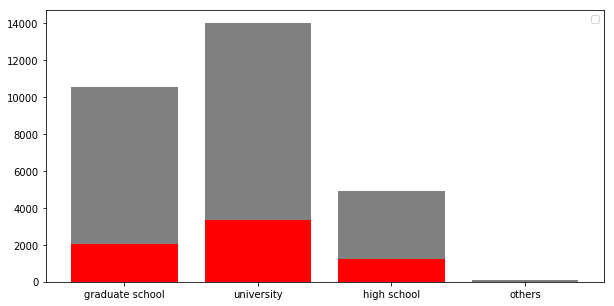

(123, 7)

In [11]:
_EDUCATION_RANGE= [1,2,3,4]
plt.figure(figsize=(10,5))

school= df['EDUCATION'][df['EDUCATION']==1].count()
school_default = df['EDUCATION'][(df['EDUCATION']==1)&(df['default payment next month'])].count()

university= df['EDUCATION'][df['EDUCATION']==2].count()
university_default = df['EDUCATION'][(df['EDUCATION']==2)&(df['default payment next month'])].count()

high_school= df['EDUCATION'][df['EDUCATION']==3].count()
high_school_default = df['EDUCATION'][(df['EDUCATION']==3)&(df['default payment next month'])].count()

others= df['EDUCATION'][df['EDUCATION']==4].count()
others_default = df['EDUCATION'][(df['EDUCATION']==4)&(df['default payment next month'])].count()

education_total = [school,university,high_school,others]
default_education_total=  [school_default,university_default,high_school_default,others_default] 


plt.bar(_EDUCATION_RANGE , education_total,color='grey')
plt.bar(_EDUCATION_RANGE , default_education_total,color='red')
plt.xticks(_EDUCATION_RANGE,['graduate school','university','high school','others'])

plt.legend()
plt.show()
others,others_default

#### Percentage defaulters in each educational background

In [12]:
p_students = (school_default/school)*100
p_university = (university_default/university)*100
p_high_school = (high_school_default/high_school)*100
p_others = (others_default/others)*100


p_students,p_university,p_high_school,p_others

(19.23476617855456, 23.734853884533145, 25.15761643278422, 5.691056910569105)

### Visualising defaulters according to their sex

No handles with labels found to put in legend.


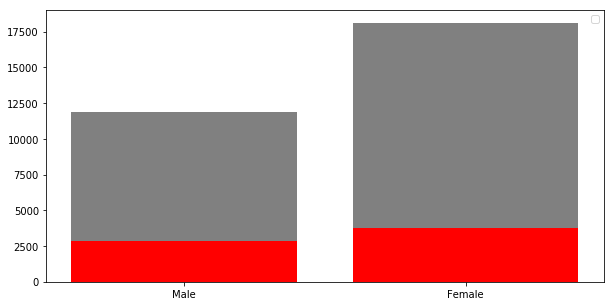

In [13]:
_SEX_RANGE= [1,2]
plt.figure(figsize=(10,5))

male= df['SEX'][df['SEX']==1].count()
male_default = df['SEX'][(df['SEX']==1)&(df['default payment next month']==1)].count()

female=df['SEX'][df['SEX']==2].count()
female_default = df['SEX'][(df['SEX']==2)&(df['default payment next month']==1)].count()


sex_total = [male,female]
default_sex_total = [male_default,female_default]

plt.bar(_SEX_RANGE,sex_total, color='grey')
plt.bar(_SEX_RANGE,default_sex_total, color='red')
plt.xticks([1,2],['Male','Female'])
plt.legend()
plt.show()

#### Percentage defaulters in each sex

In [14]:
p_male = (male_default/male)*100
p_female = (female_default/female)*100

p_male,p_female

(24.16722745625841, 20.776280918727917)

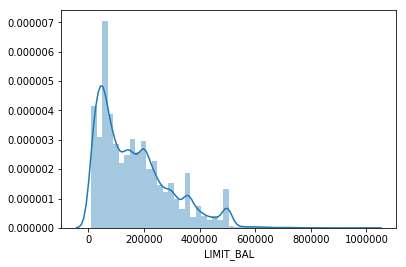

In [15]:
sns.distplot(df['LIMIT_BAL'],kde=True)

### Visualising defaulters wrt age


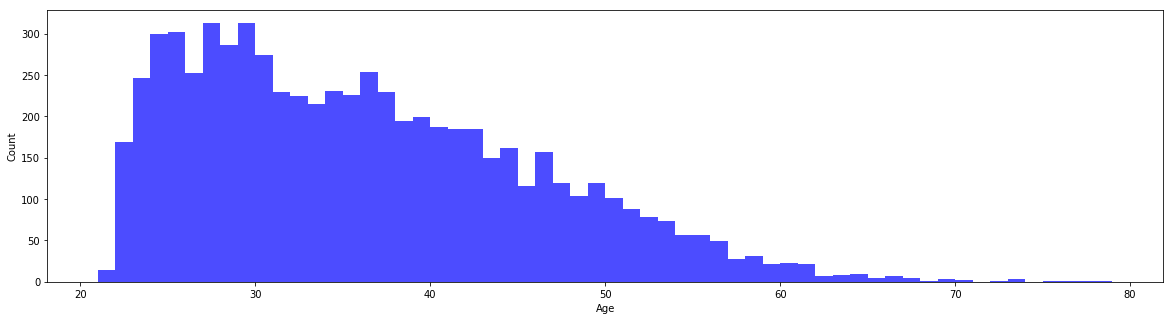

In [16]:
plt.figure(figsize=(20,5))
plt.hist(df['AGE'][(df['default payment next month']==1)], sorted(df['AGE'].unique()),color='blue',alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Realising optimum dimensions with minimal losses

In [17]:
x = df.loc[:, x_col].values
x = StandardScaler().fit_transform(x)
for i in range(1,len(df.columns)):
    pca = PCA(n_components=i)
    temp = x
    x = pca.fit_transform(x)
    x = temp
    l = pca.explained_variance_ratio_
    #explained variance ratio tells us about the information retained at each dimension/component
    info_loss = 1
    for j in l:
        info_loss-=j
    print("information loss by retaining " + str(i) +" components is " + str(info_loss*100) + " percent")

information loss by retaining 1 components is 71.5517854743898 percent
information loss by retaining 2 components is 53.73296848909867 percent
information loss by retaining 3 components is 46.98982618399407 percent
information loss by retaining 4 components is 40.58852005321923 percent
information loss by retaining 5 components is 36.13098916148421 percent
information loss by retaining 6 components is 31.969215874131095 percent
information loss by retaining 7 components is 28.023182882405568 percent
information loss by retaining 8 components is 24.163978707584928 percent
information loss by retaining 9 components is 20.375937192193096 percent
information loss by retaining 10 components is 16.971895196467194 percent
information loss by retaining 11 components is 13.785859558997432 percent
information loss by retaining 12 components is 10.81707188411222 percent
information loss by retaining 13 components is 8.334686666252859 percent
information loss by retaining 14 components is 6.054730

### Calculating accuracy using statistical models

In [0]:
X = df[x_col]
Y = df[y_col]

In [19]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [20]:
Y.head()

ID
1    1
2    1
3    0
4    0
5    0
Name: default payment next month, dtype: int64

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

#### Using random forest classifier

In [22]:
clf = RandomForestClassifier(random_state=24)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
score,clf.feature_importances_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.8098666666666666,
 array([0.05960552, 0.01379381, 0.01967705, 0.01365326, 0.06391517,
        0.10724945, 0.02192881, 0.0355277 , 0.02794781, 0.01609513,
        0.02253106, 0.06218969, 0.05610308, 0.05189653, 0.0527299 ,
        0.05086696, 0.05129282, 0.04990021, 0.0470319 , 0.04509674,
        0.04090538, 0.04443697, 0.04562503]))

#### Using Gradient boosting classifier

In [23]:
clf = GradientBoostingClassifier(random_state=24,n_estimators=10,max_depth=4)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
score

0.8188

#### Using adaboost classifier

In [24]:
clf = AdaBoostClassifier(random_state=24)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
score

0.8212

#### Using decision tree classifier

In [25]:
clf = DecisionTreeClassifier(random_state=24,max_leaf_nodes=3)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
score

0.8269333333333333

### Normalising the data

In [39]:
sc = StandardScaler()
X = sc.fit_transform(x)
X

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

### Using Neural Networks

In [0]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal', input_dim=23))
#Second  Hidden Layer
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
#Third Hideen Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
#Fourth Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [0]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [43]:
classifier.fit(x_train,y_train, batch_size=10, epochs=20)

Epoch 1/20
24000/24000 [==============================] - 14s 572us/step - loss: 0.4813 - acc: 0.7959
Epoch 2/20
24000/24000 [==============================] - 13s 562us/step - loss: 0.4532 - acc: 0.8145
Epoch 3/20
24000/24000 [==============================] - 13s 560us/step - loss: 0.4462 - acc: 0.8158
Epoch 4/20
24000/24000 [==============================] - 13s 556us/step - loss: 0.4430 - acc: 0.8167
Epoch 5/20
24000/24000 [==============================] - 13s 556us/step - loss: 0.4404 - acc: 0.8175
Epoch 6/20
24000/24000 [==============================] - 14s 571us/step - loss: 0.4389 - acc: 0.8183
Epoch 7/20
24000/24000 [==============================] - 13s 562us/step - loss: 0.4386 - acc: 0.8181
Epoch 8/20
24000/24000 [==============================] - 13s 551us/step - loss: 0.4374 - acc: 0.8193
Epoch 9/20
24000/24000 [==============================] - 13s 555us/step - loss: 0.4365 - acc: 0.8185
Epoch 10/20
24000/24000 [==============================] - 13s 551us/step - loss: 